In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

## Load the data

In [54]:
#f = lambda x: pd.datetime.strptime(x, '%y-%b-%d HH:MM:SS')
ad_data = pd.read_csv('data/ad_data.csv')#, index_col=False, parse_dates = ['start_time', 'end_time'], date_parser=d)
voters = pd.read_csv("data/registered_voters.csv", thousands=',')
past_elections = pd.read_csv("data/past_elections.csv", thousands=',')
unique_ad = pd.read_csv("data/unique_ad.csv")

92

In [56]:
merged_data = pd.merge(ad_data,
                 unique_ad,
                 on='archive_id')
merged_data.head()

,id,wp_identifier_x,network,location,program,program_type,start_time,end_time,archive_id,embed_url_x,...,candidates_y,type_y,race_y,cycle_y,message_y,air_count,reference_count,market_count,transcript,date_ingested
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,PRES,2016.0,pro,1916,0,6,IThere's a race going on right approve tnow.me...,2016/09/12 2:12:03 UTC
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,PRES,2016.0,pro,1916,0,6,IThere's a race going on right approve tnow.me...,2016/09/12 2:12:03 UTC
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,PRES,2016.0,pro,1916,0,6,IThere's a race going on right approve tnow.me...,2016/09/12 2:12:03 UTC
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,PRES,2016.0,pro,1916,0,6,IThere's a race going on right approve tnow.me...,2016/09/12 2:12:03 UTC
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,Hillary Clinton,campaign,PRES,2016.0,pro,1916,0,6,IThere's a race going on right approve tnow.me...,2016/09/12 2:12:03 UTC


In [57]:
merged_data.shape

(375350, 34)

In [58]:
ad_data.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49


In [59]:
ad_data.shape

(375350, 19)

In [60]:
ad_data['location'].value_counts()

Boston, MA/Manchester, NH                            50920
Philadelphia, PA                                     44326
Las Vegas, NV                                        42131
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         24580
Tampa-St. Petersburg, FL                             24207
Cleveland, Ohio                                      23156
San Francisco-Oakland-San Jose, CA                   20944
Des Moines-Ames, Iowa                                17726
Raleigh-Durham-Fayetteville,  NC                     17437
Milwaukee, WI                                        15423
Sioux City, Iowa                                     12906
Phoenix-Prescott, AZ                                 12900
Washington, DC/Hagerstown, MD                        12325
Denver, CO                                           10901
Columbia, SC                                         10870
Greenville-Spartanburg, SC/Asheville-Anderson, NC     8565
Reno, NV                                              60

In [61]:
ad_data.race.unique()

array(['PRES', 'NHS1', 'PAS1', 'AZS1', 'AZ05', 'WIS2', nan, 'INS2',
       'WI01', 'ILS2', 'CAS1', 'MD08', 'PA08', 'MDS2', 'MD04', 'PA02',
       'KS01', 'IAS1', 'NCS2', 'NVS2', 'OHS2', 'COS1', 'FLS2', 'CO06',
       'OH08', 'OH14', 'NC02', 'NC11', 'NJ03', 'KYS2'], dtype=object)

In [62]:
ad_data[ad_data.race == "PRES"].shape

(223722, 19)

In [63]:
ad_data[ad_data.race == "PRES"].shape[0] / ad_data.shape[0]

0.5960357000133208

c:\users\mutho\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


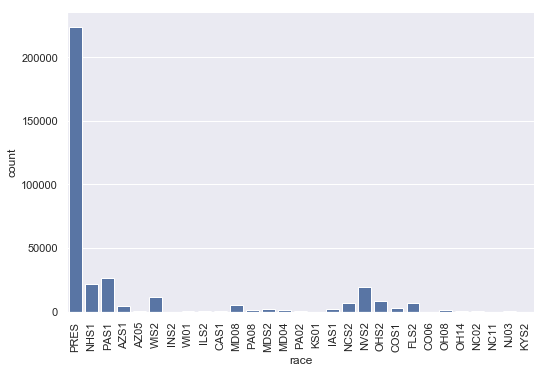

In [64]:
g = sns.factorplot("race", data=ad_data, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

In [65]:
ad_data.message.value_counts()

con        128108
pro        115091
unknown     78724
mixed       53024
mix           403
Name: message, dtype: int64

In [66]:
## Recode mix to mixed
ad_data['message'].replace("mix", "mixed", inplace=True)

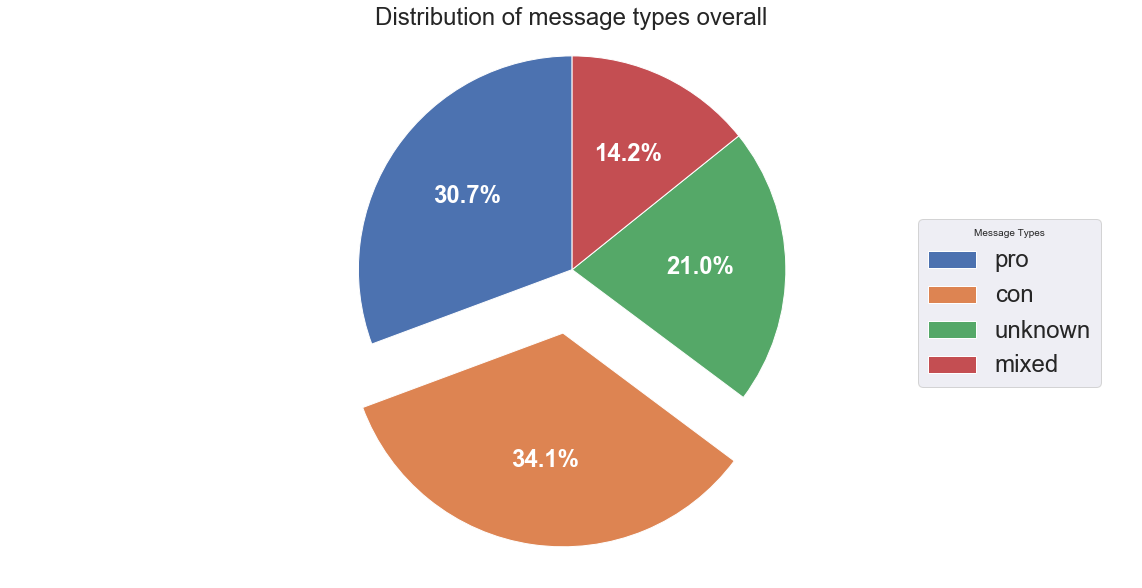

In [67]:
labels = 'pro', 'con', "unknown", "mixed"
sizes = ad_data.message.value_counts().tolist()
sizes[0], sizes[1] = sizes[1], sizes[0]
explode = (0, 0.3, 0, 0)

fig1, ax = plt.subplots(figsize=(20, 10))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w"))
ax.axis('equal') 
ax.legend(wedges, labels,
          title="Message Types",
          loc="center left",
          prop={'size': 24},
          bbox_to_anchor=(0.8, 0, 0, 1))

plt.setp(autotexts, size=24, weight="bold")
ax.set_title("Distribution of message types overall", size=24)
plt.show()


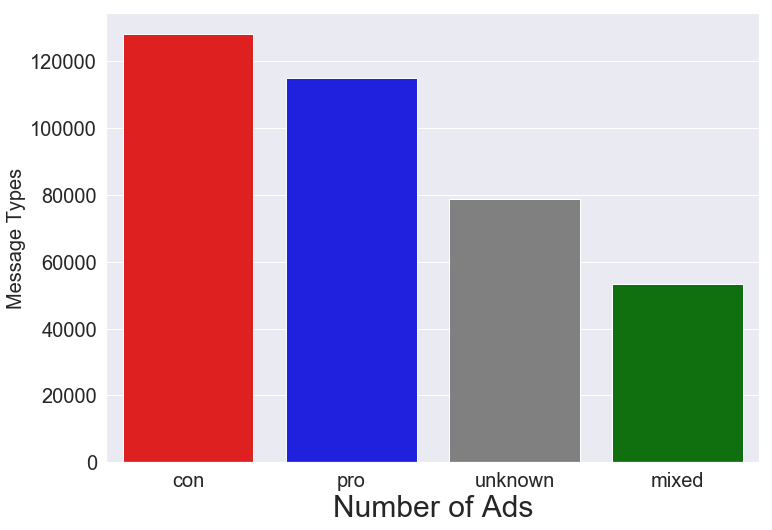

In [68]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(data=ad_data, x="message", order = ad_data['message'].value_counts().index, palette=["red", "blue", "grey", "green"])
#ax.axes.set_title("Types of messages",fontsize=50)
ax.set_xlabel("Number of Ads",fontsize=30)
ax.set_ylabel("Message Types",fontsize=20)
ax.tick_params(labelsize=20)

## Working With Presidential Data Only

In [70]:
pres_data = ad_data[ad_data.race=='PRES']

In [71]:
pres_data.shape

(223722, 19)

## The Cities We Will Investigate

In [72]:
pres_data['location'].value_counts()

Boston, MA/Manchester, NH                            27566
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         22384
Las Vegas, NV                                        17851
Des Moines-Ames, Iowa                                17163
Tampa-St. Petersburg, FL                             16688
San Francisco-Oakland-San Jose, CA                   16282
Philadelphia, PA                                     15168
Cleveland, Ohio                                      14039
Sioux City, Iowa                                     12906
Columbia, SC                                         10352
Greenville-Spartanburg, SC/Asheville-Anderson, NC     8558
Raleigh-Durham-Fayetteville,  NC                      8128
Denver, CO                                            6641
Reno, NV                                              6031
Milwaukee, WI                                         4101
Orlando-Daytona Beach-Melbourne, FL                   4027
Phoenix-Prescott, AZ                                  32

In [79]:
LOCATIONS = [
 'Boston, MA/Manchester, NH',
 'Philadelphia, PA',
 'Las Vegas, NV',
 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
 'Tampa-St. Petersburg, FL',
 'Cleveland, Ohio',
 'San Francisco-Oakland-San Jose, CA',
 'Des Moines-Ames, Iowa', 
 #'Raleigh-Durham-Fayetteville,  NC',
 #'Milwaukee, WI'
 'Sioux City, Iowa',
 'Columbia, SC'
]

## Distribution of Message Types

In [73]:
pres_data.message.unique()

array(['pro', 'con', 'mixed', 'unknown'], dtype=object)

In [58]:
pres_data.message.value_counts()

pro        70092
con        61628
unknown    57317
mixed      34685
Name: message, dtype: int64

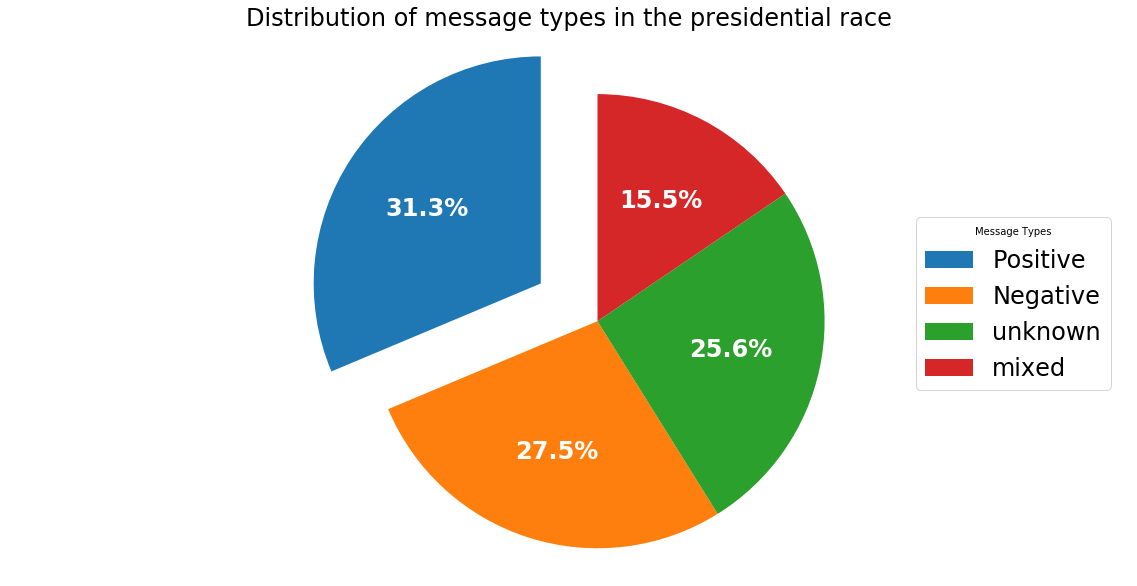

In [59]:
labels = 'Positive', 'Negative', "unknown", "mixed"
sizes = pres_data.message.value_counts().tolist()
explode = (0.3, 0, 0, 0)

fig1, ax = plt.subplots(figsize=(20, 10))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w"))
ax.axis('equal') 
ax.legend(wedges, labels,
          title="Message Types",
          loc="center left",
          prop={'size': 24},
          bbox_to_anchor=(0.8, 0, 0, 1))

plt.setp(autotexts, size=24, weight="bold")
ax.set_title("Distribution of message types in the presidential race", size=24)
plt.show()


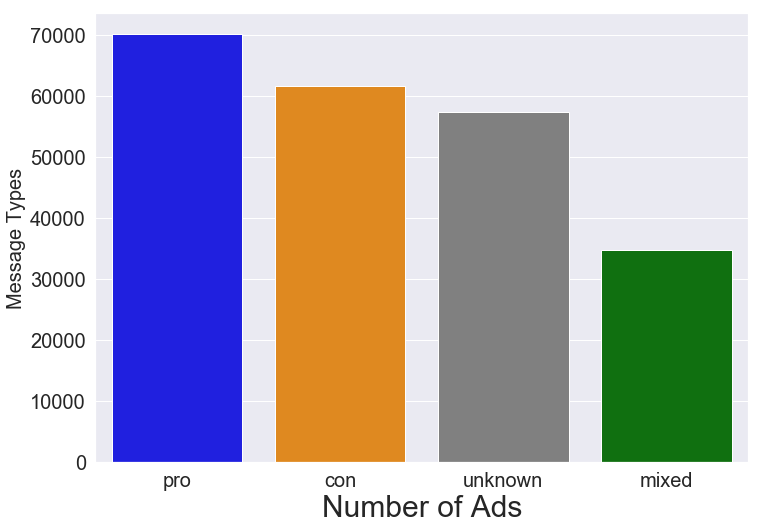

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(data=pres_data, x="message", order = ad_data['message'].value_counts().index, palette=["blue", "darkorange", "grey", "green"])
#ax.axes.set_title("Types of messages",fontsize=50)
ax.set_xlabel("Number of Ads",fontsize=30)
ax.set_ylabel("Message Types",fontsize=20)
ax.tick_params(labelsize=20)

## Voter registration

In [20]:
voters.head()

,state,group,county,city,registered,democrat,republican,other,source,voted_for_hillary,voted_for_trump,total_votes,party_won
0,CA,"San Francisco-Oakland-San Jose, CA",San Francisco,San Francisco,"512,723","296,772","38,279","177,672",https://elections.cdn.sos.ca.gov/sov/2016-gene...,"345,084","37,688","405,792",D
1,CA,"San Francisco-Oakland-San Jose, CA",Almaeda,Oakland,"888,664","510,429","107,482","270,753",https://elections.cdn.sos.ca.gov/sov/2016-gene...,"514,842","95,922","654,266",D
2,CA,"San Francisco-Oakland-San Jose, CA",Santa Clara,San Jose,"875,176","411,479","171,281","292,416",https://elections.cdn.sos.ca.gov/sov/2016-gene...,"511,684","144,826","703,709",D
3,MA,"Boston, MA/Manchester, NH",Suffolk county,Boston,"471,829","235,436","28,033","208,360",https://www.sec.state.ma.us/ele/eleregistratio...,"245,751",50421,317207,D
4,NV,"Las Vegas, NV",Clark county,Las Vegas,"1,185,893","512,041","338,372","335,480",https://www.nvsos.gov/sos/elections/voters/vot...,"402,227","320,057",767156,D


## Cities with the most negative ads

In [35]:
c = pres_data[pres_data.message == "con"]
c.shape

(61628, 19)

In [36]:
c['location'].value_counts().index.tolist()

['Tampa-St. Petersburg, FL',
 'Philadelphia, PA',
 'San Francisco-Oakland-San Jose, CA',
 'Cleveland, Ohio',
 'Las Vegas, NV',
 'Boston, MA/Manchester, NH',
 'Raleigh-Durham-Fayetteville,  NC',
 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
 'Milwaukee, WI',
 'Denver, CO',
 'Columbia, SC',
 'Phoenix-Prescott, AZ',
 'Orlando-Daytona Beach-Melbourne, FL',
 'Greenville-Spartanburg, SC/Asheville-Anderson, NC',
 'Des Moines-Ames, Iowa',
 'Washington, DC/Hagerstown, MD',
 'Sioux City, Iowa',
 'Miami-Fort Lauderdale, FL',
 'Cincinnati, OH',
 'Charlotte, NC',
 'New York City, NY',
 'Reno, NV',
 'Colorado Springs-Pueblo, CO',
 'Roanoke-Lynchburg, VA',
 'Norfolk-Portsmouth-Newport News, NC']

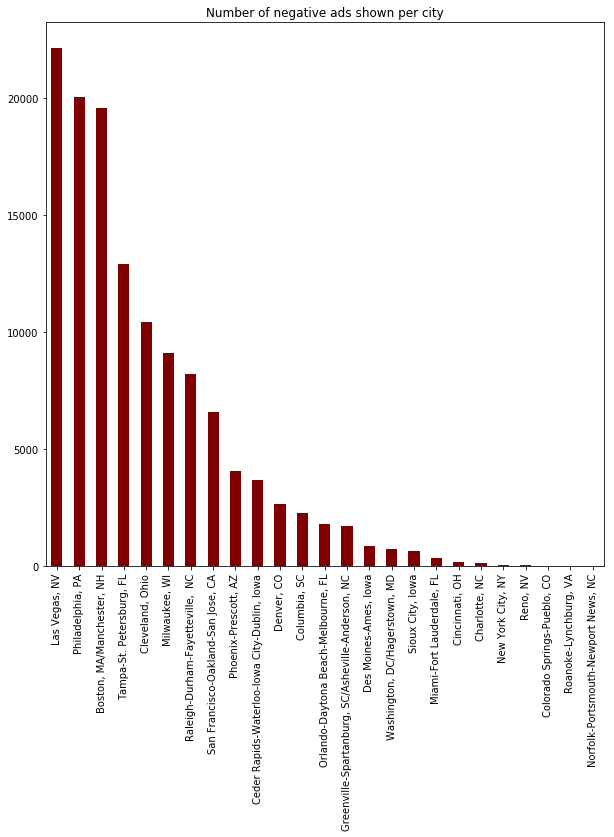

In [21]:
c.location.value_counts().plot(kind='bar', figsize=(10,10), title="Number of negative ads shown per city", colormap="OrRd_r")

## Cities with the most positive ads

In [15]:
p = pres_data[pres_data.message == "pro"]
p.shape

(115091, 19)

In [16]:
p['location'].value_counts()

Boston, MA/Manchester, NH                            13606
Philadelphia, PA                                     12057
Las Vegas, NV                                        11773
Washington, DC/Hagerstown, MD                         8698
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa          8604
Cleveland, Ohio                                       6509
Des Moines-Ames, Iowa                                 6469
Sioux City, Iowa                                      4620
Raleigh-Durham-Fayetteville,  NC                      4529
Denver, CO                                            4524
Columbia, SC                                          4392
San Francisco-Oakland-San Jose, CA                    4377
Tampa-St. Petersburg, FL                              3915
Milwaukee, WI                                         3522
Phoenix-Prescott, AZ                                  3492
Greenville-Spartanburg, SC/Asheville-Anderson, NC     3430
Reno, NV                                              31

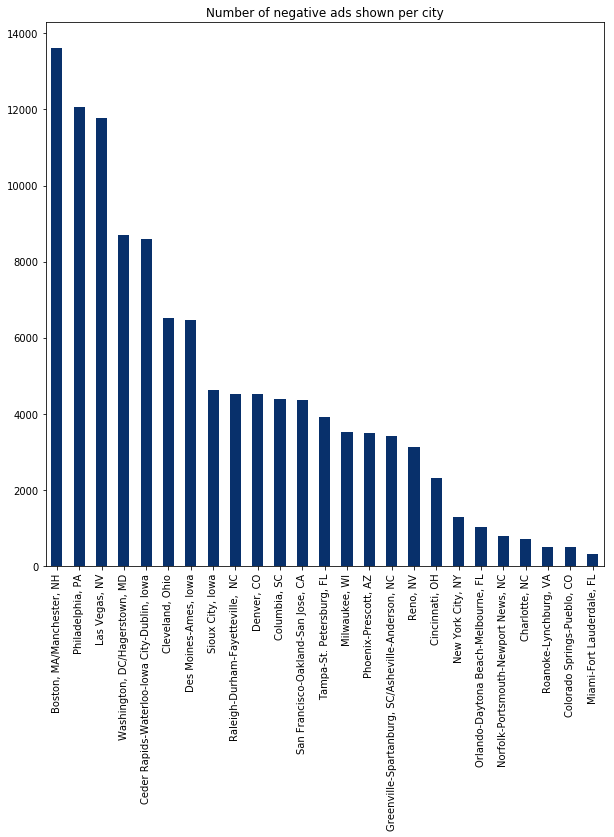

In [18]:
p.location.value_counts().plot(kind='bar', figsize=(10,10), title="Number of negative ads shown per city", colormap="Blues_r")

### Bringing them together

In [40]:
locations = ['Tampa-St. Petersburg, FL',
 'Philadelphia, PA',
 'San Francisco-Oakland-San Jose, CA',
 'Cleveland, Ohio',
 'Las Vegas, NV',
 'Boston, MA/Manchester, NH',
 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
 'Columbia, SC',
 'Des Moines-Ames, Iowa',
 'Sioux City, Iowa']

In [41]:
def c(location):
    return pres_data[(pres_data.location == location) & (pres_data.message=="con")]['location'].count()
def p(location):
    return pres_data[(pres_data.location == location) & (pres_data.message=="pro")]['location'].count()

#locations = ad_data.location.value_counts().keys().tolist()[0:10]

pos = [p(location) for location in locations]
neg = [c(location) for location in locations]
print(locations, pos, neg)

['Tampa-St. Petersburg, FL', 'Philadelphia, PA', 'San Francisco-Oakland-San Jose, CA', 'Cleveland, Ohio', 'Las Vegas, NV', 'Boston, MA/Manchester, NH', 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa', 'Columbia, SC', 'Des Moines-Ames, Iowa', 'Sioux City, Iowa'] [3155, 3670, 3185, 3823, 6224, 8737, 7576, 4391, 6469, 4620] [8685, 7130, 6574, 6225, 5954, 3943, 3438, 2275, 839, 624]


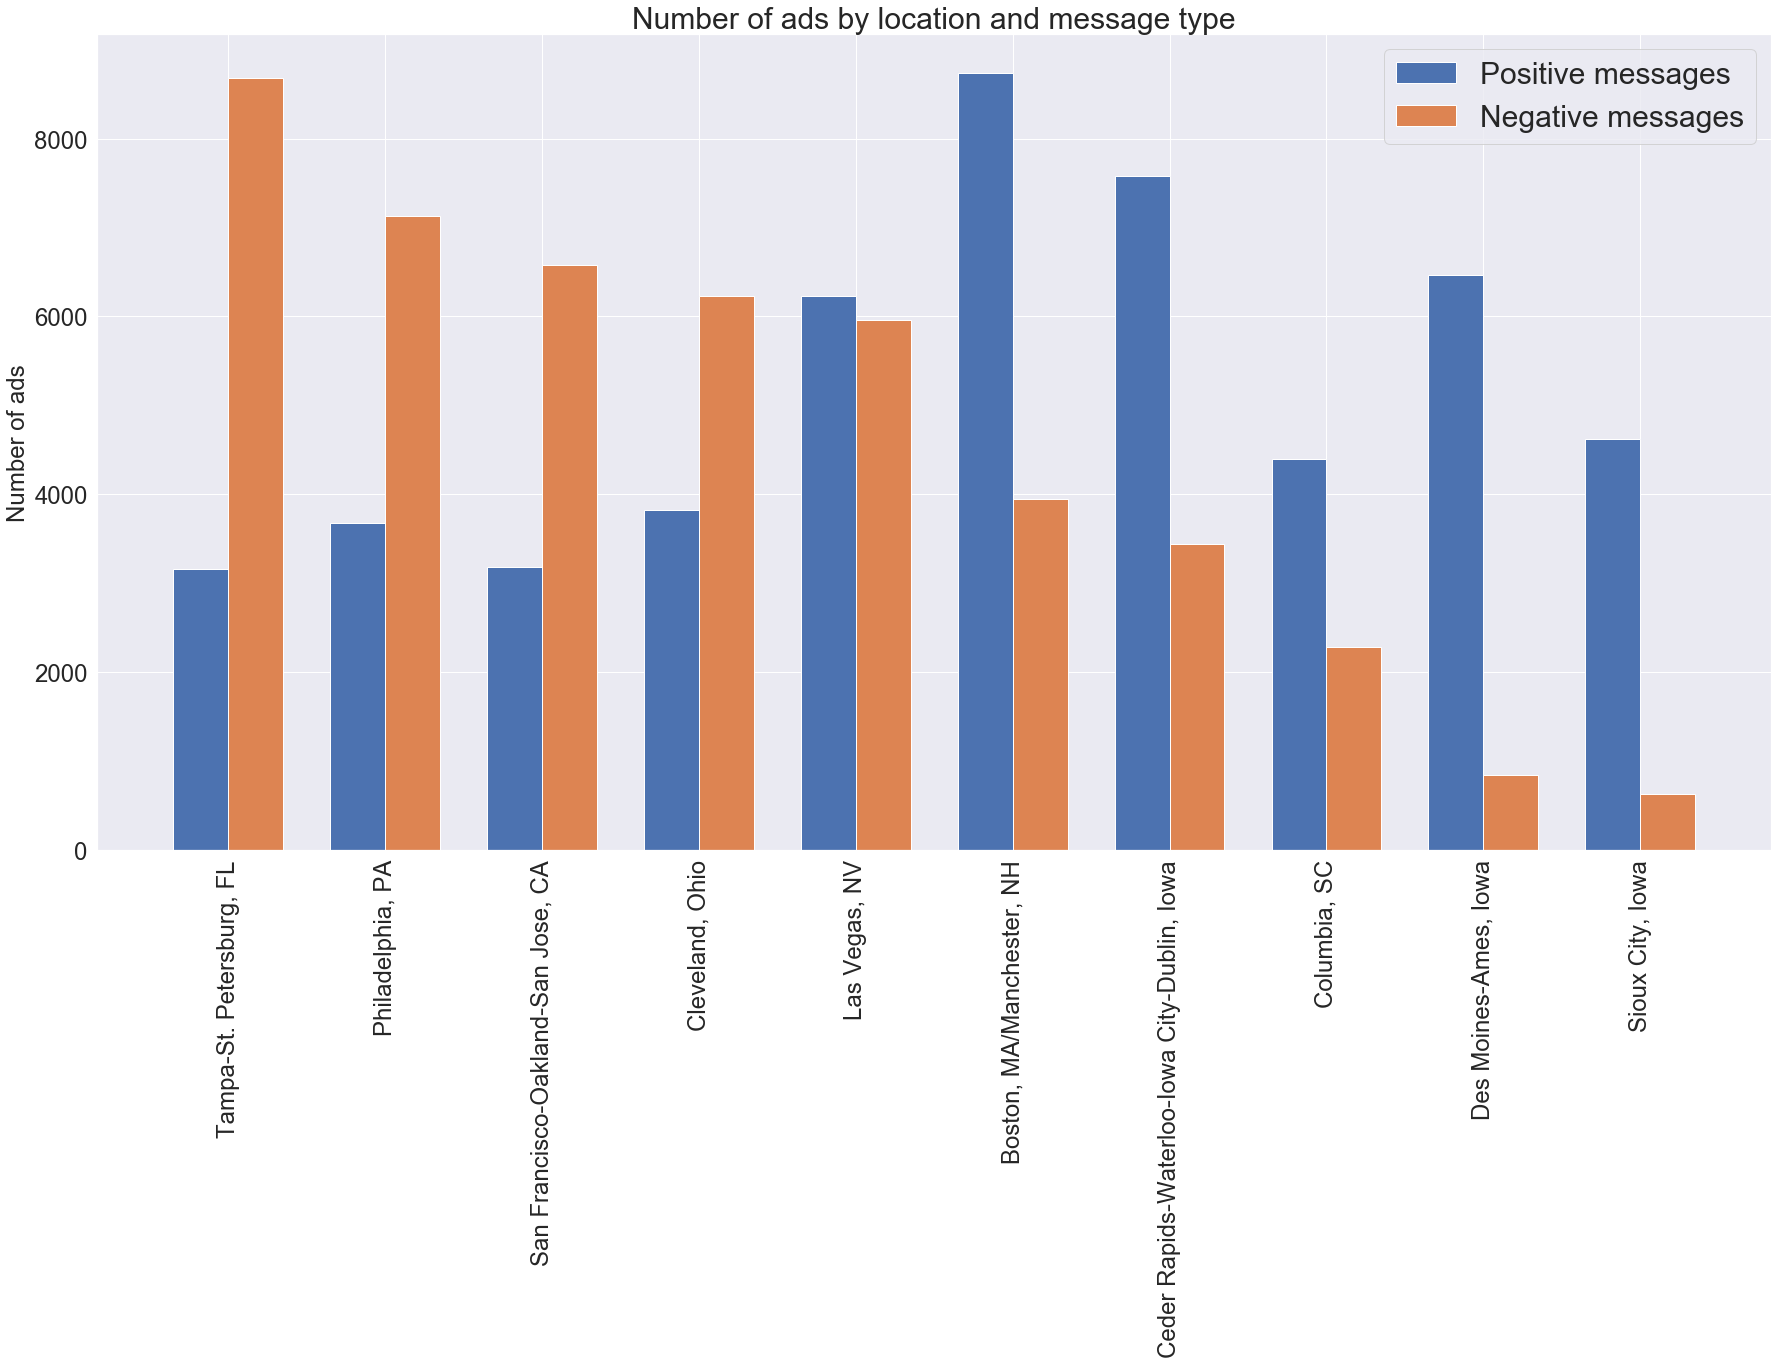

In [42]:
N = len(locations[:10])

ind = np.arange(N) 
width = 0.35 
plt.figure(figsize=(30,15))
plt.bar(ind, pos, width, label='Positive messages')
plt.bar(ind + width, neg, width, label='Negative messages')

plt.ylabel('Number of ads', size=24)
plt.title('Number of ads by location and message type', size=30)

plt.xticks(ind + width / 2, locations, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.legend(loc='best', prop={'size': 30})
plt.show()

In [78]:
def c(location):
    return merged_data[(merged_data.location == location) & (merged_data.message_y=="con")]['air_count'].sum()
def p(location):
    return merged_data[(merged_data.location == location) & (merged_data.message_y=="pro")]['air_count'].sum()

#locations = ad_data.location.value_counts().keys().tolist()[0:10]

pos = [p(location) for location in locations]
neg = [c(location) for location in locations]
print(locations, pos, neg)

['Tampa-St. Petersburg, FL', 'Philadelphia, PA', 'San Francisco-Oakland-San Jose, CA', 'Cleveland, Ohio', 'Las Vegas, NV', 'Boston, MA/Manchester, NH', 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa', 'Columbia, SC', 'Des Moines-Ames, Iowa', 'Sioux City, Iowa'] [3948653, 7306918, 2260922, 5087963, 10720649, 11526838, 8808588, 2243926, 6941746, 5263155] [12345202, 16055761, 5059202, 9061567, 17107274, 13546648, 4467386, 941368, 262134, 184245]


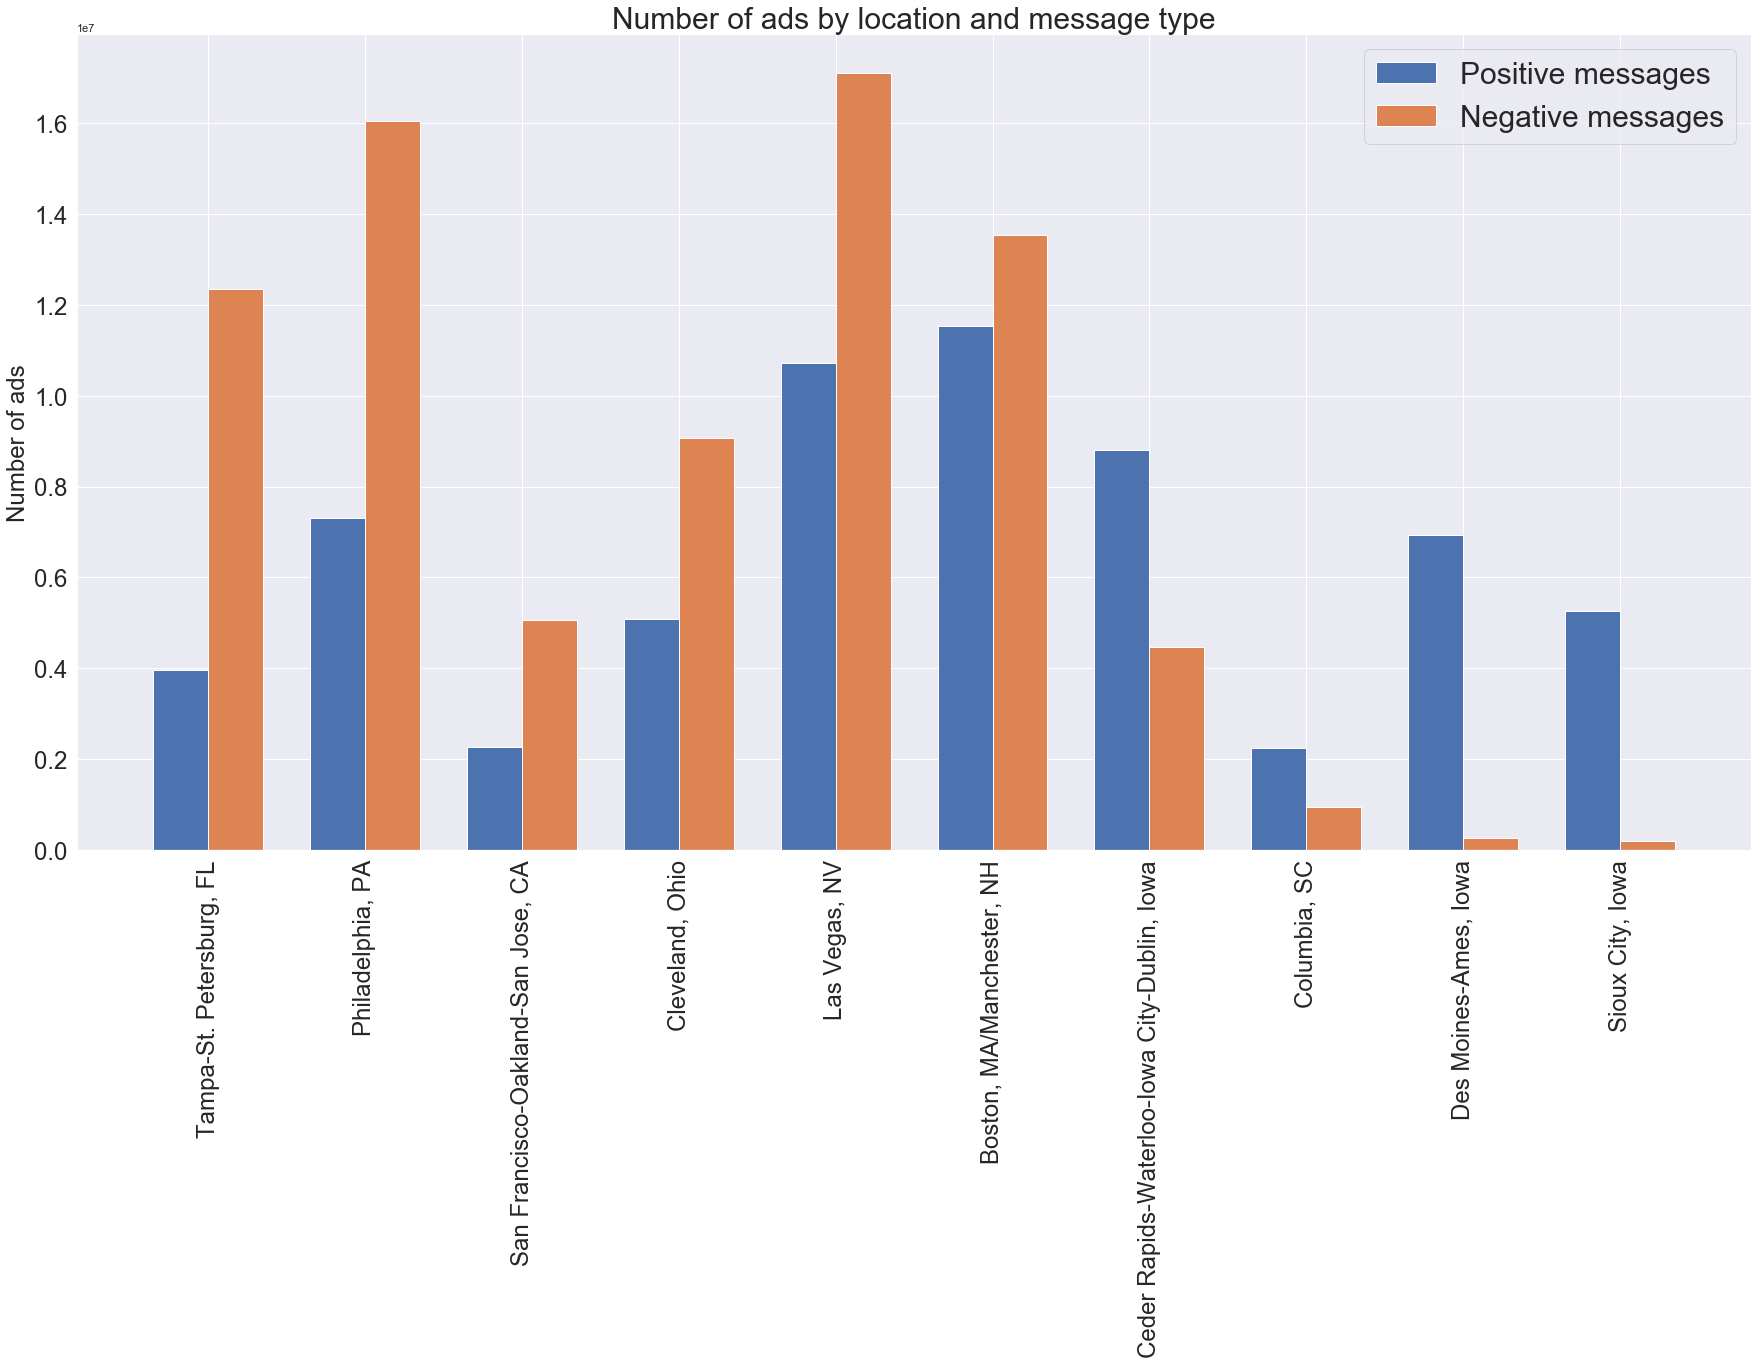

In [147]:
N = len(locations[:10])

ind = np.arange(N) 
width = 0.35 
plt.figure(figsize=(30,15))
plt.bar(ind, pos, width, label='Positive messages')
plt.bar(ind + width, neg, width, label='Negative messages')

plt.ylabel('Number of ads', size=24)
plt.title('Number of ads by location and message type', size=30)

plt.xticks(ind + width / 2, locations, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.legend(loc='best', prop={'size': 30})
plt.show()

## Election Results

In [108]:
voters.columns

Index(['state', 'group', 'county', 'city', 'registered', 'democrat',
       'republican', 'other', 'source', 'voted_for_hillary', 'voted_for_trump',
       'total_votes', 'party_won'],
      dtype='object')

In [110]:
agg = {'registered': sum, 'democrat':sum,
       'republican':sum, 'other':sum, 'voted_for_hillary':sum, 'voted_for_trump':sum,
       'total_votes':sum}

v = voters.groupby('group').agg(agg).reset_index()
v

,group,registered,democrat,republican,other,voted_for_hillary,voted_for_trump,total_votes
0,"Boston, MA/Manchester, NH",750601,312814.0,113859.0,323928,345340,150434,527953
1,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",370073,142911.0,93902.0,133260,145311,103083,269372
2,"Cleveland, Ohio",891568,225482.0,149871.0,516215,383974,179894,584410
3,"Columbia, SC",254913,0.0,0.0,254913,108000,52469,168722
4,"Des Moines-Ames, Iowa",97560,34774.0,27208.0,35578,33921,28987,69770
5,"Las Vegas, NV",1185893,512041.0,338372.0,335480,402227,320057,767156
6,"Milwaukee, WI",566816,0.0,0.0,566816,288822,126069,441053
7,"Philadelphia, PA",1102560,853091.0,125557.0,123912,584025,108748,707631
8,"Raleigh-Durham-Fayetteville, NC",1149536,494985.0,267689.0,386862,495340,275563,810849
9,"San Francisco-Oakland-San Jose, CA",2276563,1218680.0,317042.0,740841,1371610,278436,1763767


In [118]:
agg = {
    'dem_08_votes':sum, 'dem_12_votes':sum,
       'rep_08_votes':sum, 'rep_12_votes':sum
}
pe = past_elections.groupby('group').agg(agg).reset_index()
pe

,group,dem_08_votes,dem_12_votes,rep_08_votes,rep_12_votes
0,"Boston, MA/Manchester, NH",514361,311948,326199,154372
1,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",264346,163418,164183,94267
2,"Cleveland, Ohio",583230,458422,447273,199880
3,"Columbia, SC",105656,103989,57941,53105
4,"Des Moines-Ames, Iowa",67623,39010,38080,26716
5,"Las Vegas, NV",765421,380765,389936,257078
6,"Milwaukee, WI",434970,319819,332438,149445
7,"Philadelphia, PA",680227,595980,588806,117221
8,"Raleigh-Durham-Fayetteville, NC",785885,429040,454278,271505
9,"San Francisco-Oakland-San Jose, CA",1637638,1273567,1222225,361886


In [119]:
voter_data = pd.merge(v, pe, on='group')
voter_data

,group,registered,democrat,republican,other,voted_for_hillary,voted_for_trump,total_votes,dem_08_votes,dem_12_votes,rep_08_votes,rep_12_votes
0,"Boston, MA/Manchester, NH",750601,312814.0,113859.0,323928,345340,150434,527953,514361,311948,326199,154372
1,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",370073,142911.0,93902.0,133260,145311,103083,269372,264346,163418,164183,94267
2,"Cleveland, Ohio",891568,225482.0,149871.0,516215,383974,179894,584410,583230,458422,447273,199880
3,"Columbia, SC",254913,0.0,0.0,254913,108000,52469,168722,105656,103989,57941,53105
4,"Des Moines-Ames, Iowa",97560,34774.0,27208.0,35578,33921,28987,69770,67623,39010,38080,26716
5,"Las Vegas, NV",1185893,512041.0,338372.0,335480,402227,320057,767156,765421,380765,389936,257078
6,"Milwaukee, WI",566816,0.0,0.0,566816,288822,126069,441053,434970,319819,332438,149445
7,"Philadelphia, PA",1102560,853091.0,125557.0,123912,584025,108748,707631,680227,595980,588806,117221
8,"San Francisco-Oakland-San Jose, CA",2276563,1218680.0,317042.0,740841,1371610,278436,1763767,1637638,1273567,1222225,361886
9,"Tampa-St. Petersburg, FL",1507844,571631.0,500940.0,435273,541597,506071,1090063,1086592,521262,525571,446421


In [120]:
voter_data.loc[voter_data.group == 'Tampa-St. Petersburg, FL']

,group,registered,democrat,republican,other,voted_for_hillary,voted_for_trump,total_votes,dem_08_votes,dem_12_votes,rep_08_votes,rep_12_votes
9,"Tampa-St. Petersburg, FL",1507844,571631.0,500940.0,435273,541597,506071,1090063,1086592,521262,525571,446421


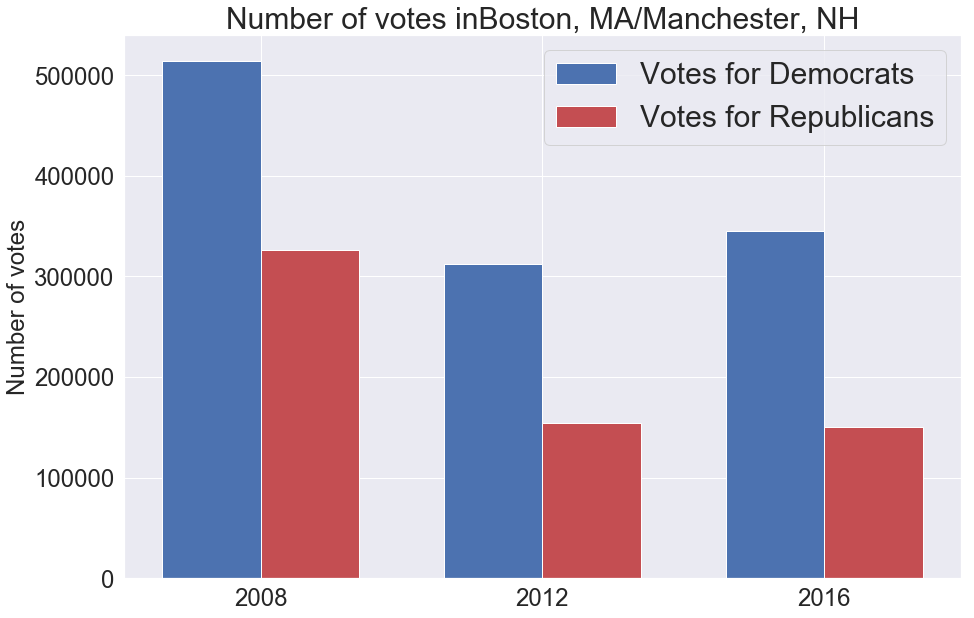

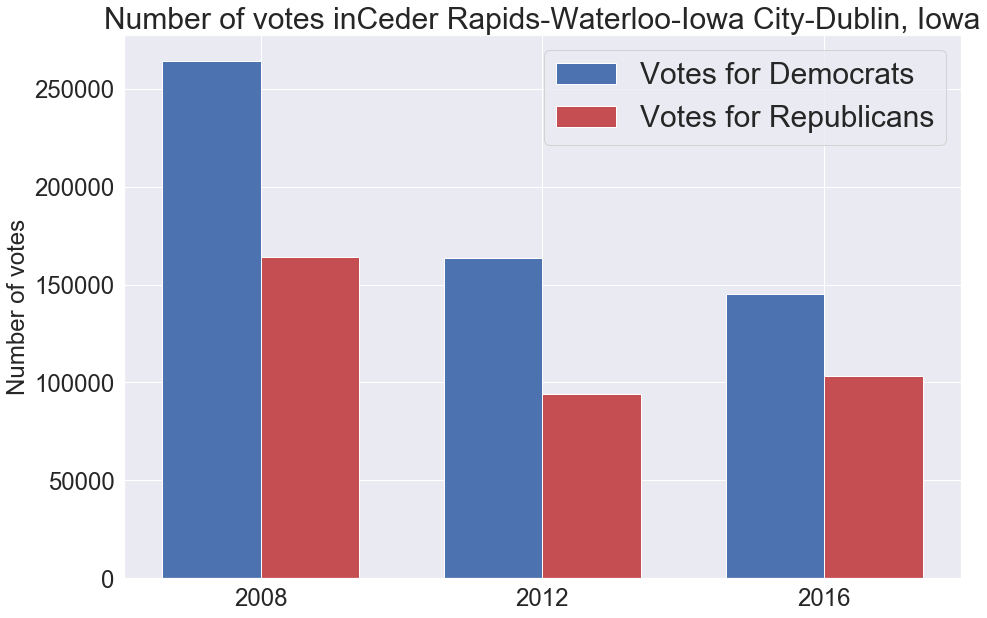

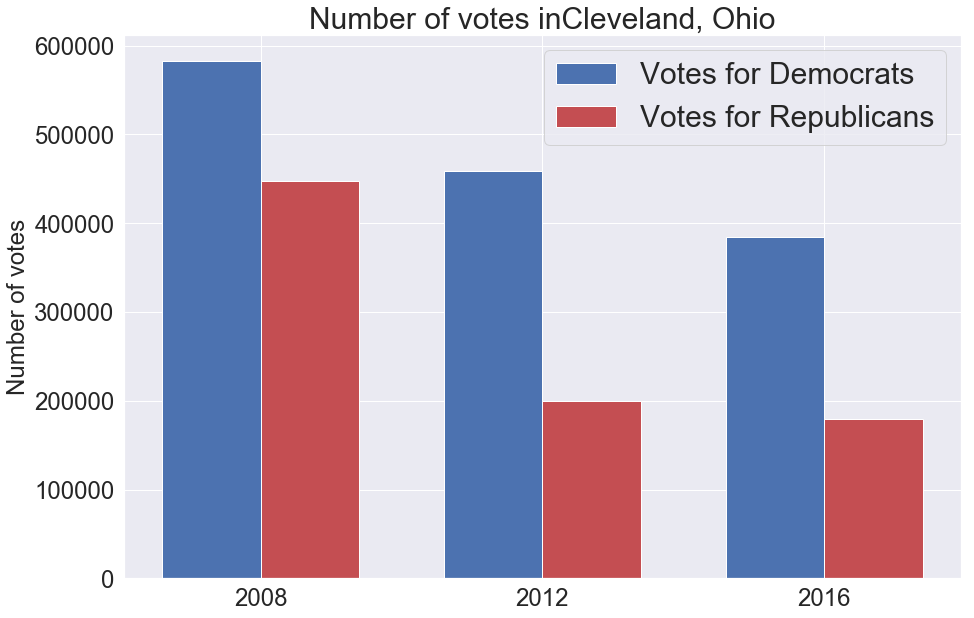

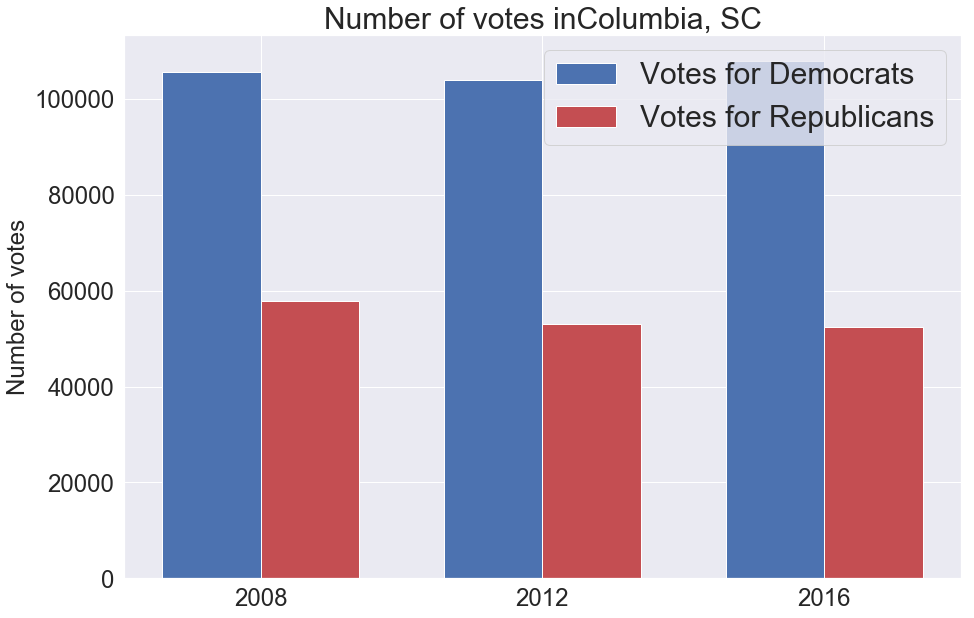

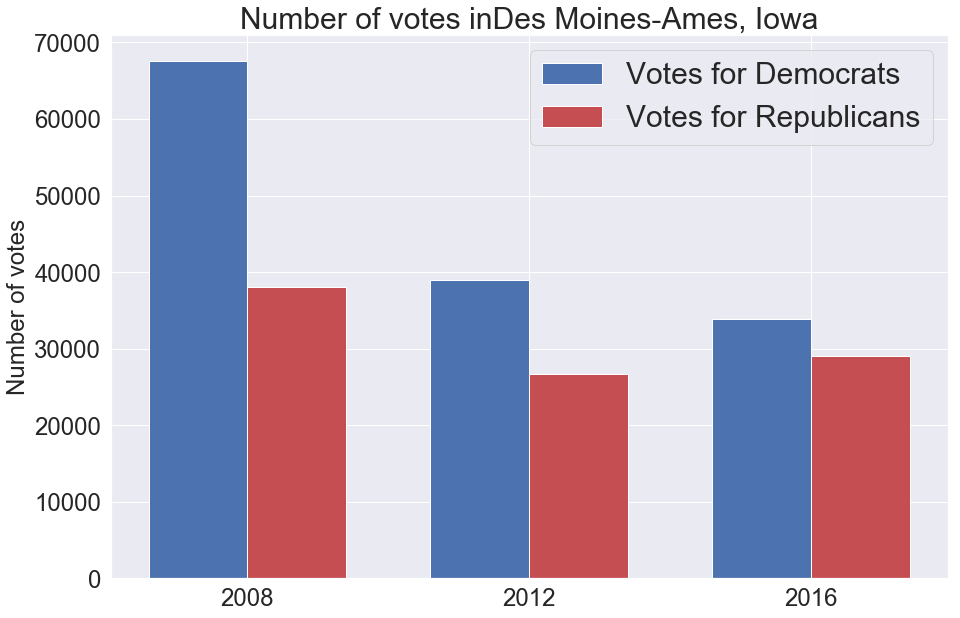

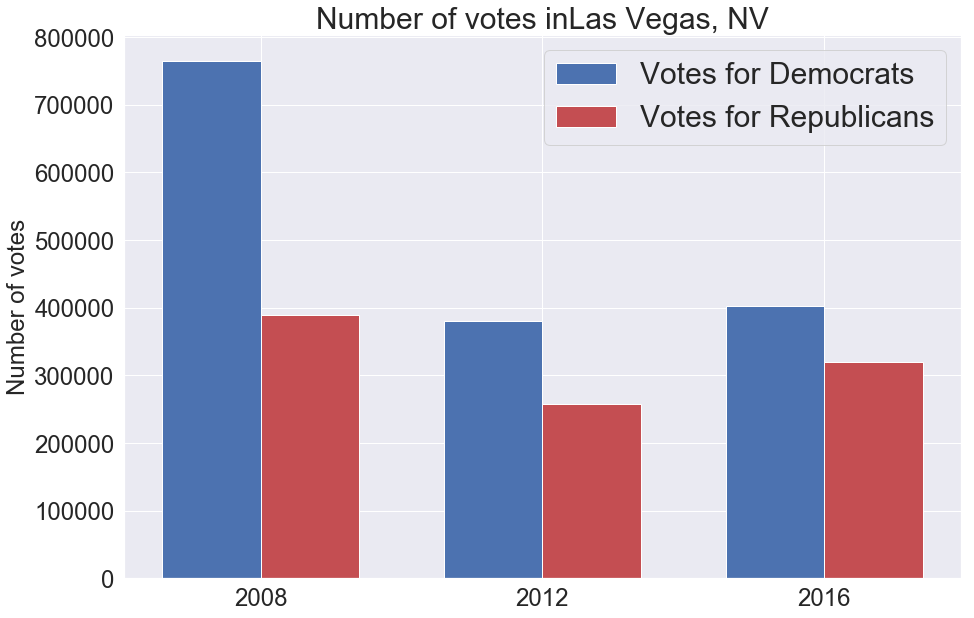

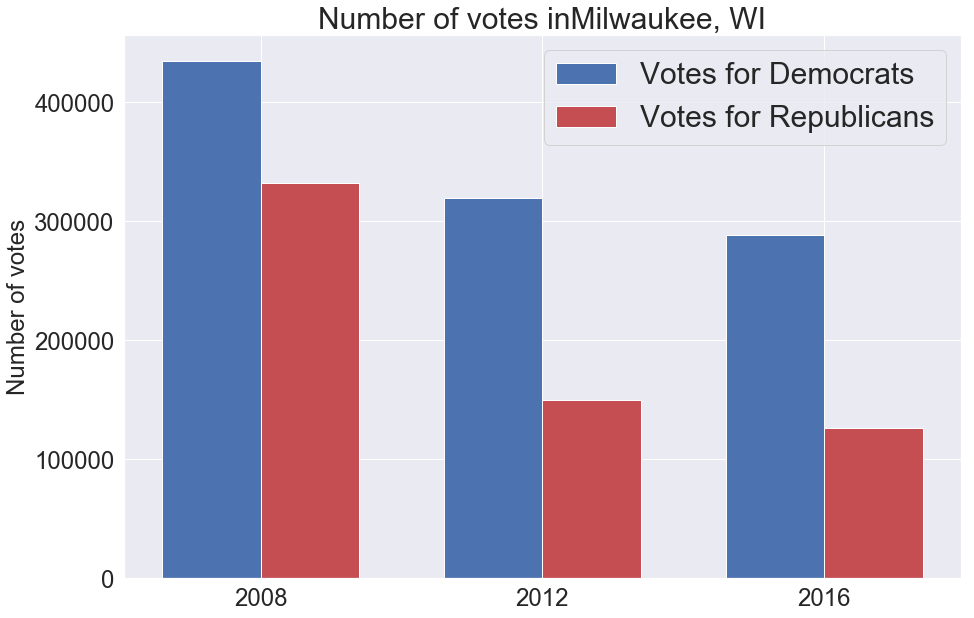

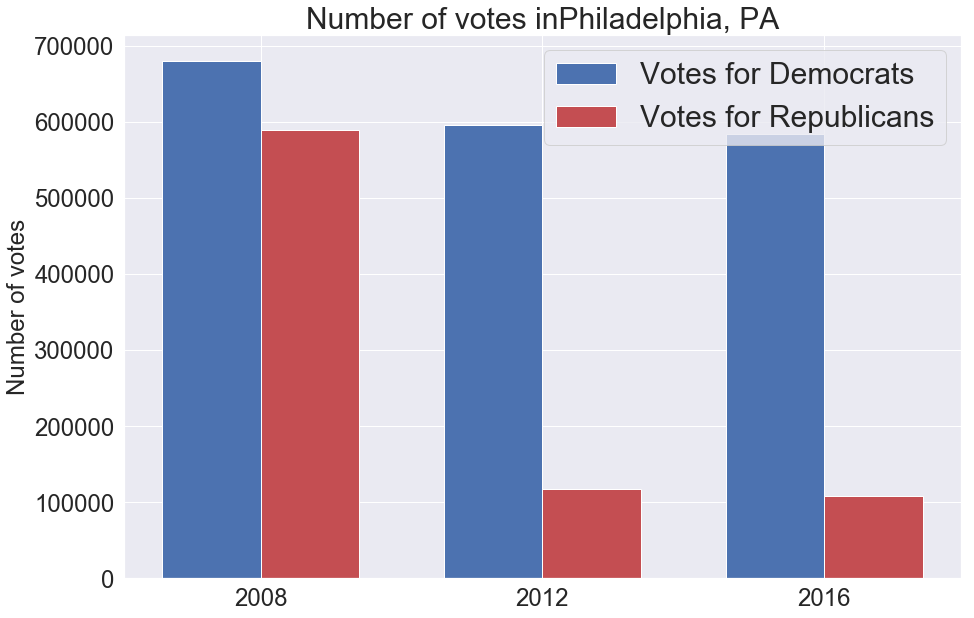

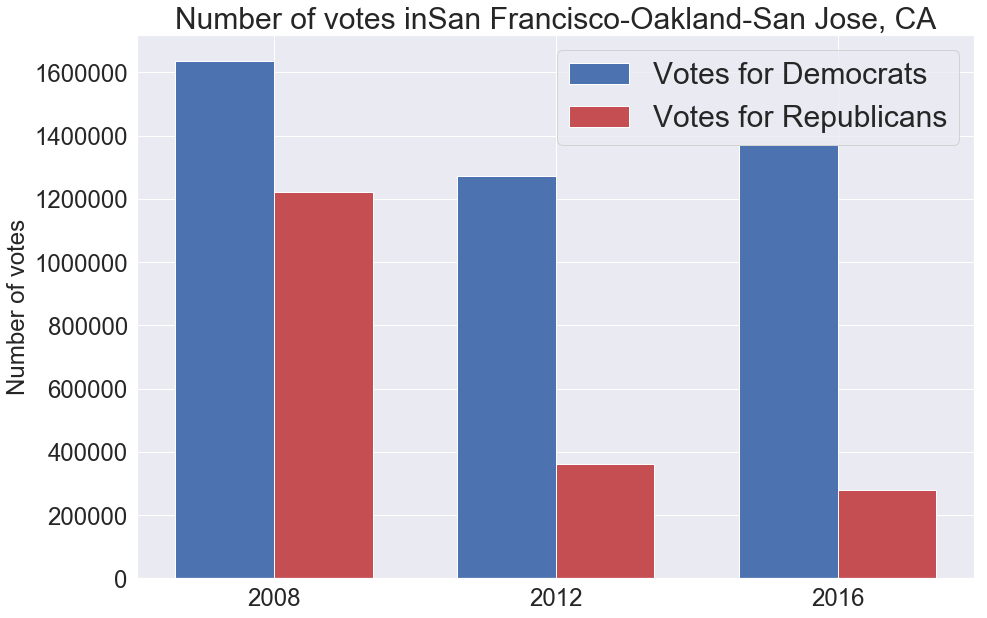

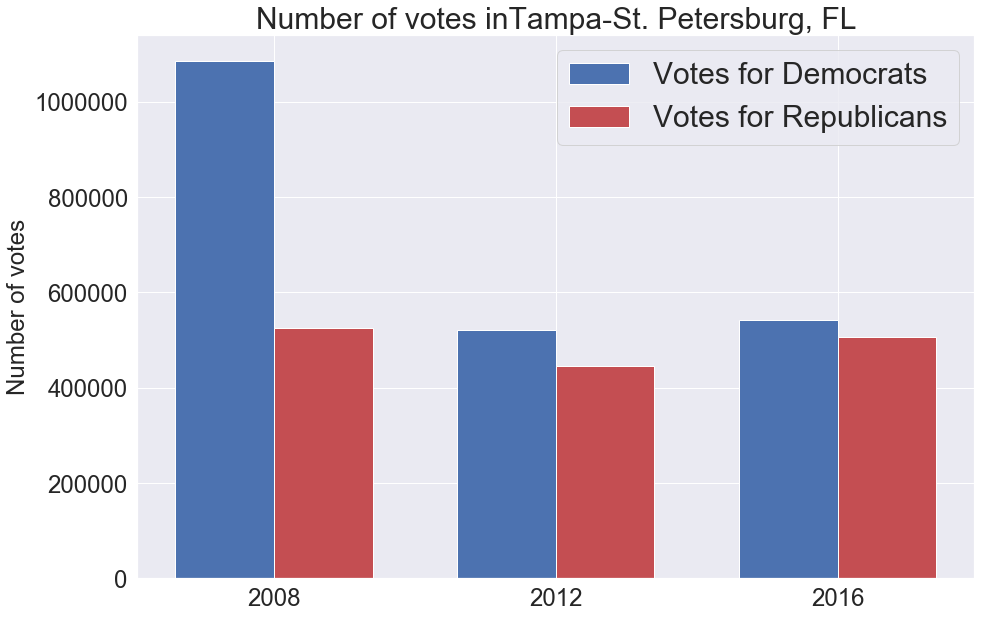

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: group, dtype: object

In [134]:
def draw_graph(location):
    d = voter_data.loc[voter_data.group == location]
    #cols = ['registered', 'democrat', 'republican','voted_for_hillary', 'voted_for_trump', 'total_votes', 'dem_08_votes','dem_12_votes', 'rep_08_votes', 'rep_12_votes']
    cols = ['dem_08_votes', 'rep_08_votes', 'dem_12_votes', 'rep_12_votes','voted_for_hillary', 'voted_for_trump']
    dems = [int(d[col]) for i,col in enumerate(cols) if i % 2 == 0]
    gop =  [int(d[col]) for i,col in enumerate(cols) if i % 2 == 1]
    
    years = ["2008", "2012", "2016"]
    ind = np.arange(3) 
    width = 0.35 
    plt.figure(figsize=(15,10))
    plt.bar(ind, dems, width, label='Votes for Democrats')
    plt.bar(ind + width, gop, width, label='Votes for Republicans', color="r")

    plt.ylabel('Number of votes', size=24)
    plt.title('Number of votes in' + location, size=30)

    plt.xticks(ind + width / 2, years)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.legend(loc='best', prop={'size': 30})
    plt.show()
    
voter_data['group'].apply(draw_graph)

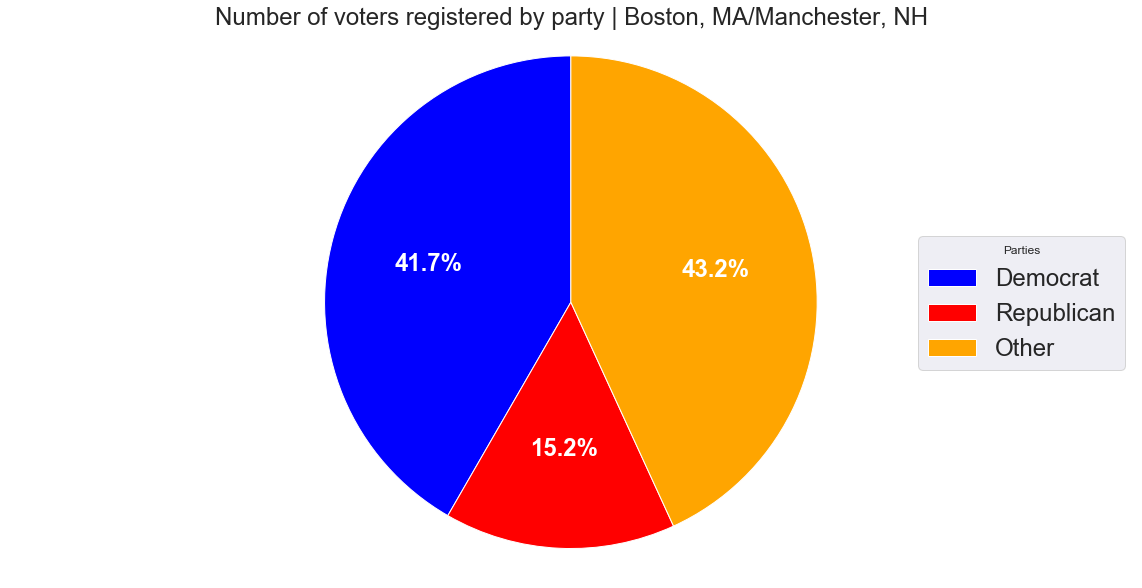

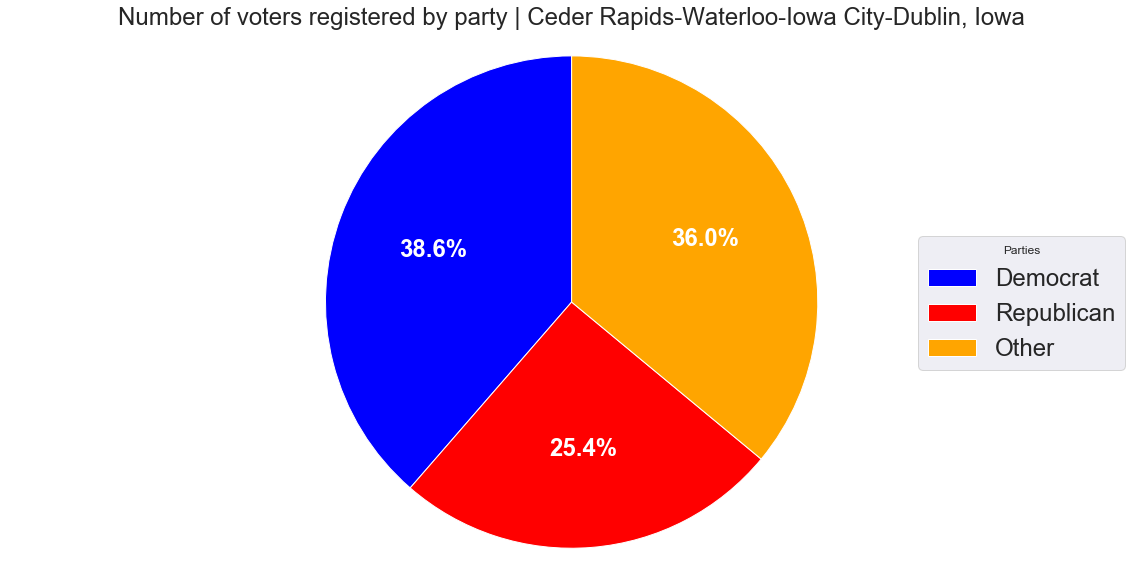

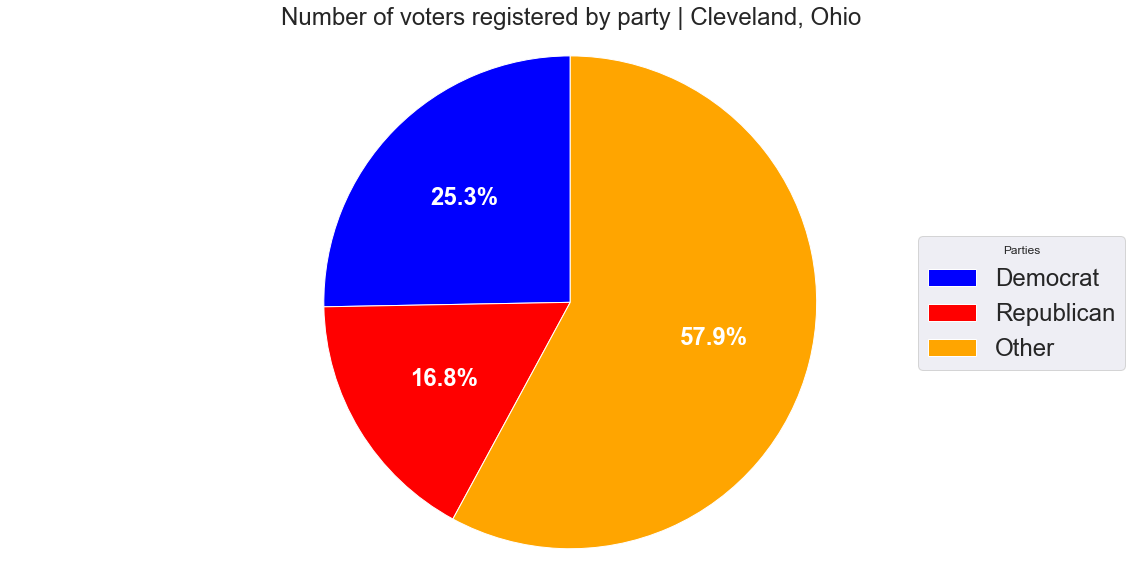

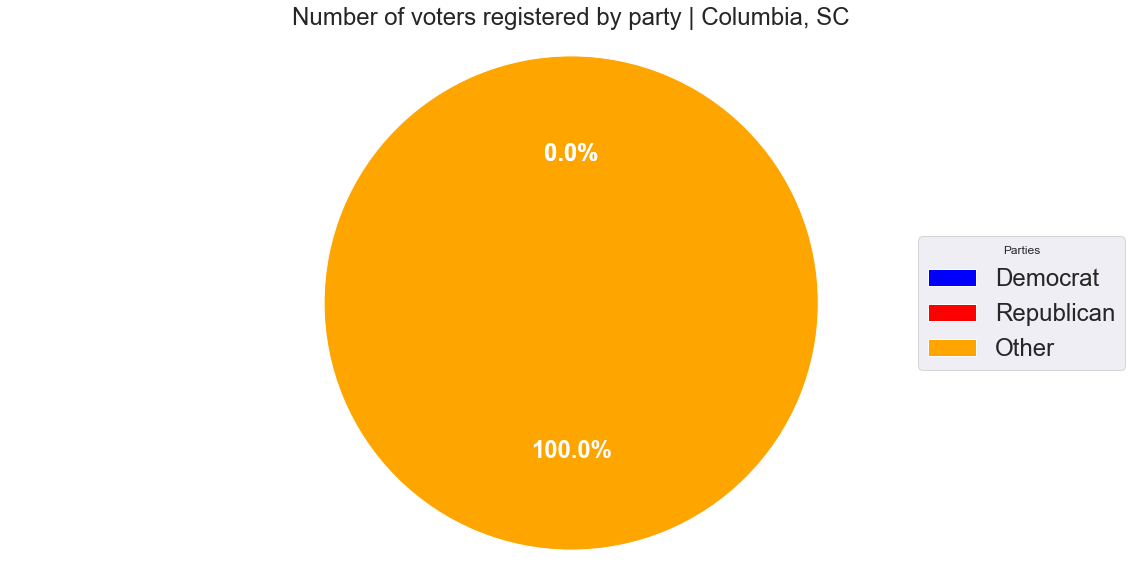

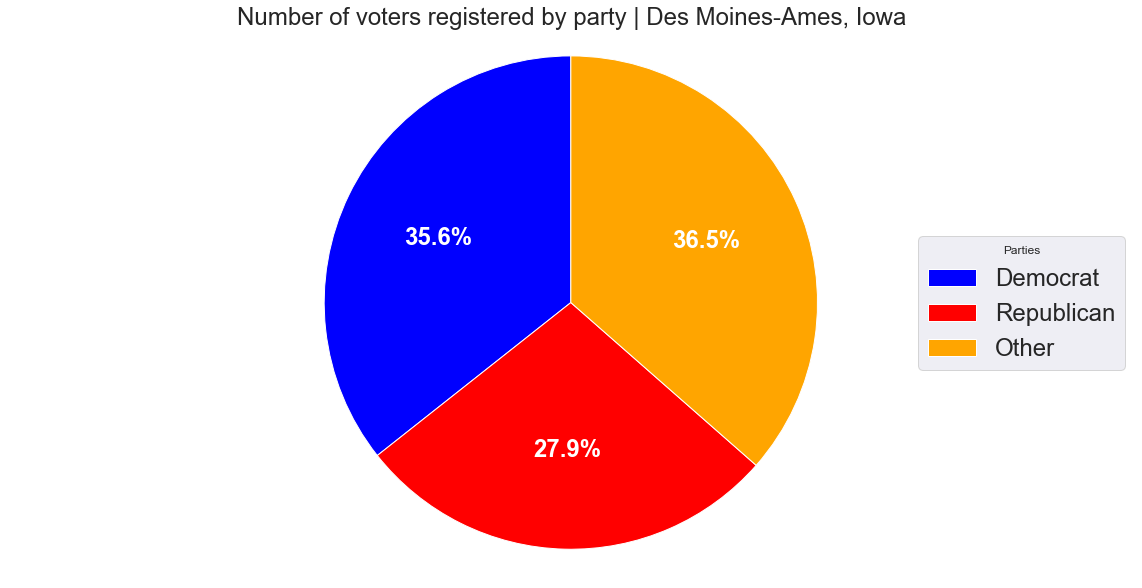

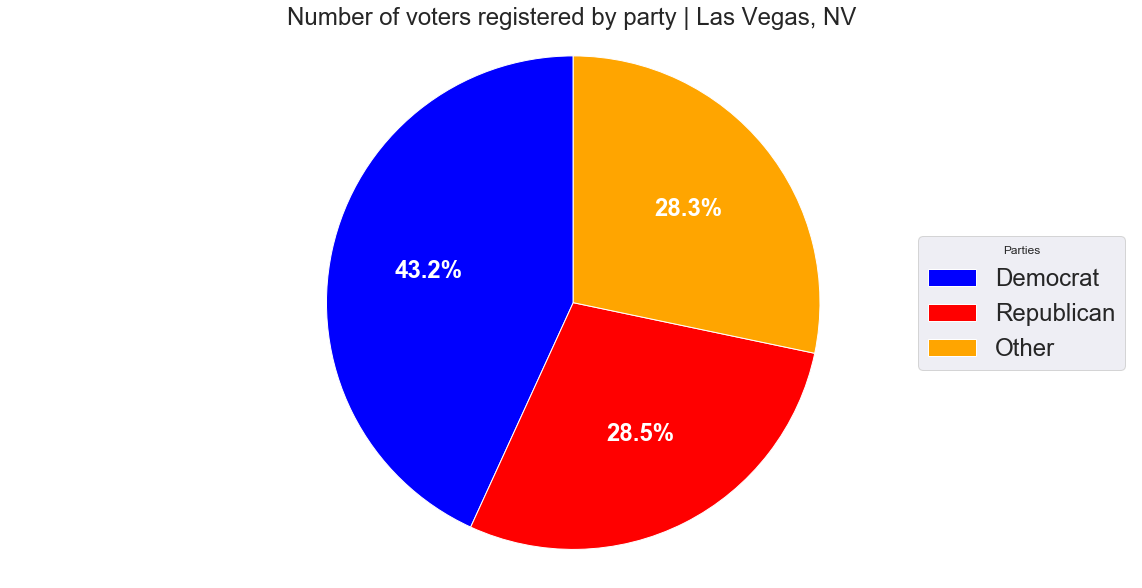

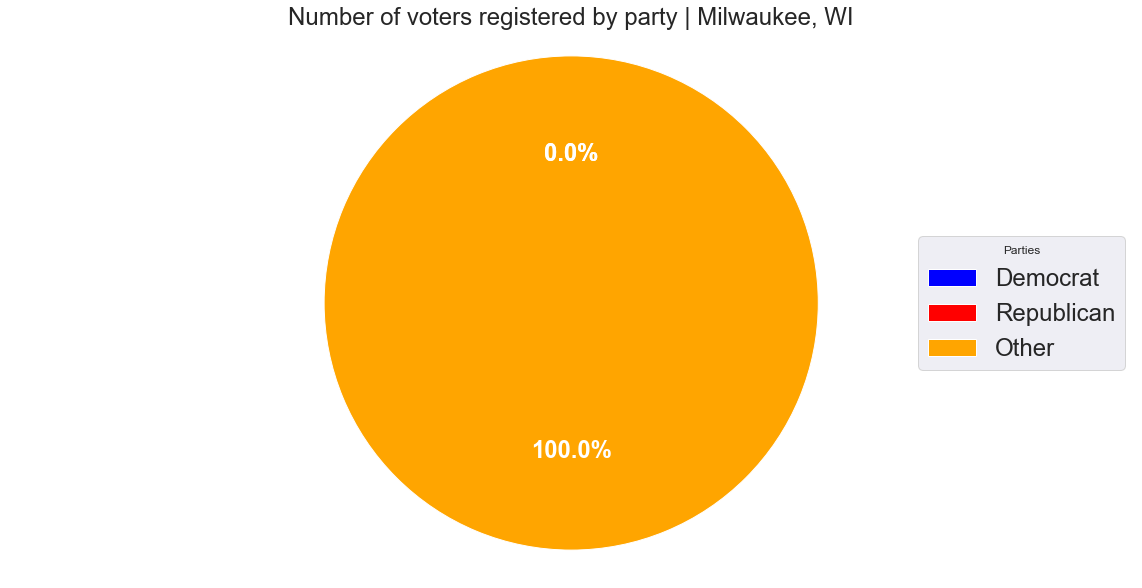

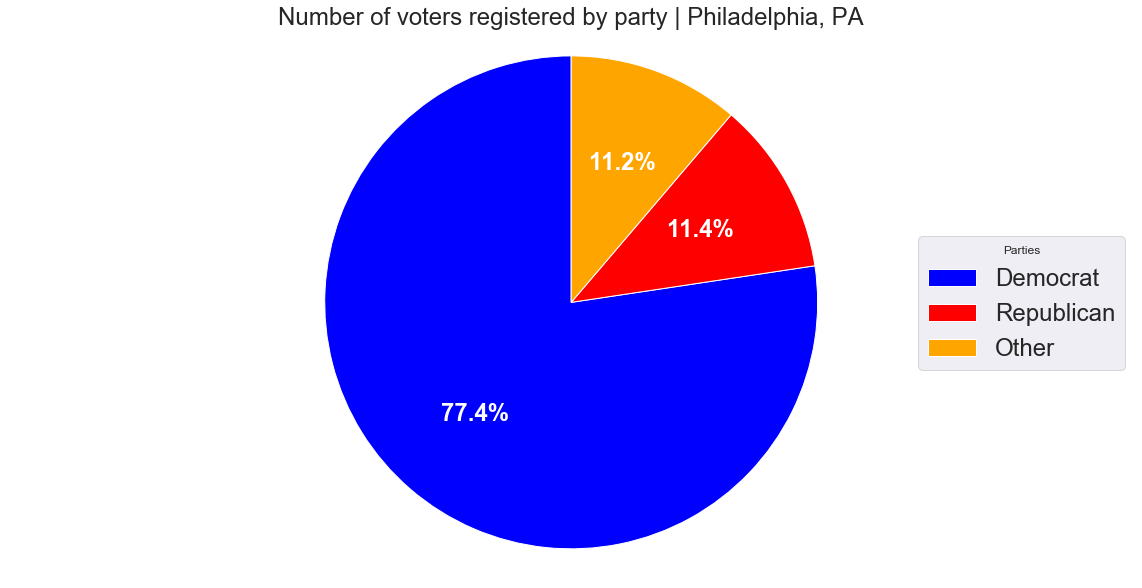

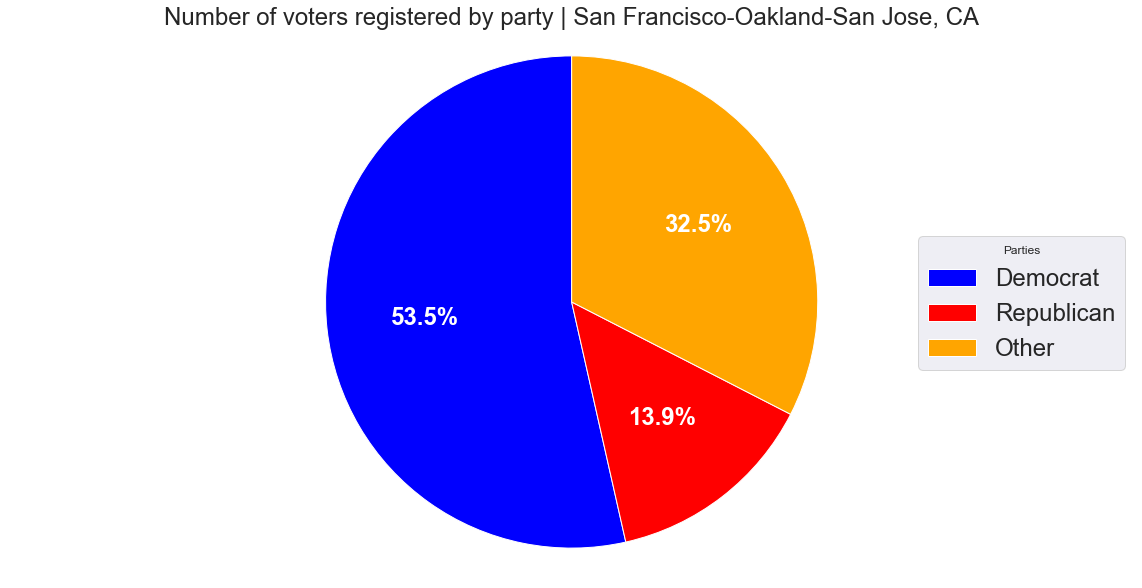

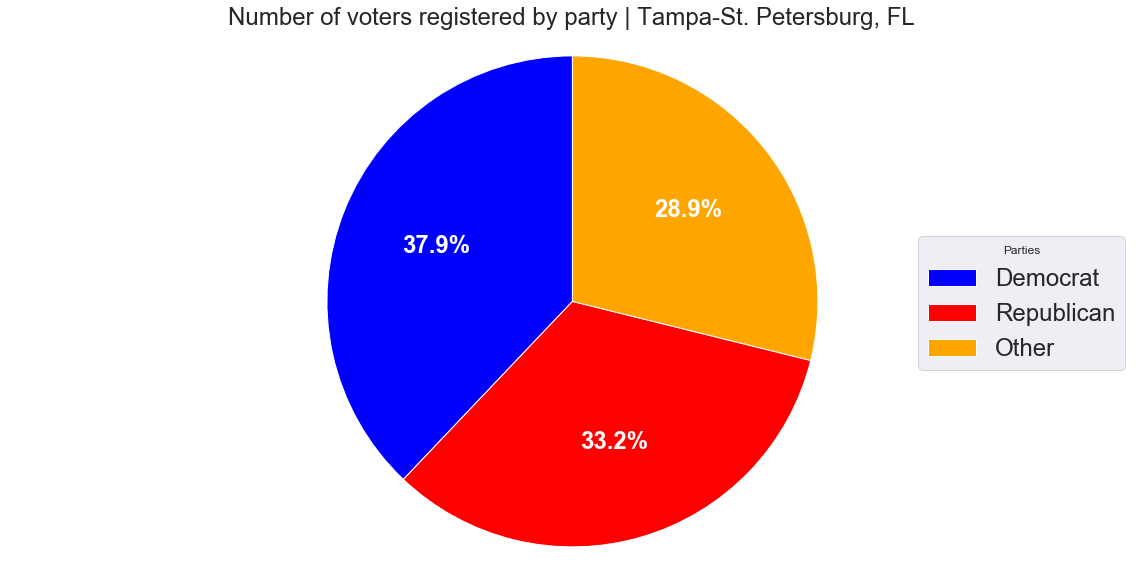

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: group, dtype: object

In [145]:
def draw_pie(location):
    d = voter_data.loc[voter_data.group == location]
    labels = 'Democrat', 'Republican', "Other"
    cols = ["democrat","republican","other"]
    data = [int(d[col]) for i,col in enumerate(cols)] 

    fig1, ax = plt.subplots(figsize=(20, 10))
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%',
                                      colors=["blue", "red", "orange"],
                                      shadow=False, startangle=90, textprops=dict(color="w"))
    ax.axis('equal') 
    ax.legend(wedges, labels,
              title="Parties",
              loc="center left",
              prop={'size': 24},
              bbox_to_anchor=(0.8, 0, 0, 1))

    plt.setp(autotexts, size=24, weight="bold")
    ax.set_title("Number of voters registered by party | " + location, size=24)
    plt.show()
    
voter_data['group'].apply(draw_pie)

## Voter turnout

In [144]:
voters.head()

,state,group,county,city,registered,democrat,republican,other,source,voted_for_hillary,voted_for_trump,total_votes,party_won
0,CA,"San Francisco-Oakland-San Jose, CA",San Francisco,San Francisco,512723,296772.0,38279.0,177672,https://elections.cdn.sos.ca.gov/sov/2016-gene...,345084,37688,405792,D
1,CA,"San Francisco-Oakland-San Jose, CA",Almaeda,Oakland,888664,510429.0,107482.0,270753,https://elections.cdn.sos.ca.gov/sov/2016-gene...,514842,95922,654266,D
2,CA,"San Francisco-Oakland-San Jose, CA",Santa Clara,San Jose,875176,411479.0,171281.0,292416,https://elections.cdn.sos.ca.gov/sov/2016-gene...,511684,144826,703709,D
3,MA,"Boston, MA/Manchester, NH",Suffolk county,Boston,471829,235436.0,28033.0,208360,https://www.sec.state.ma.us/ele/eleregistratio...,245751,50421,317207,D
4,NV,"Las Vegas, NV",Clark county,Las Vegas,1185893,512041.0,338372.0,335480,https://www.nvsos.gov/sos/elections/voters/vot...,402227,320057,767156,D


In [146]:
def turnout(location):
    r = voters.loc[voters.group == location]['registered'].sum()
    tv = voters.loc[voters.group == location]['total_votes'].sum()
    return tv/r * 100

voter_data['group'].apply(turnout)

0    70.337370
1    72.788882
2    65.548562
3    66.188072
4    71.514965
5    64.690153
6    77.812377
7    64.180725
8    77.474992
9    72.292823
Name: group, dtype: float64

In [146]:
turnout

[70.33736965445023,
 72.78888219351317,
 64.69015332749245,
 71.5149651496515,
 72.29282339552367,
 77.4749919066593,
 64.18072485851111,
 65.54856163523142,
 69.40356558873489,
 66.18807200888146]

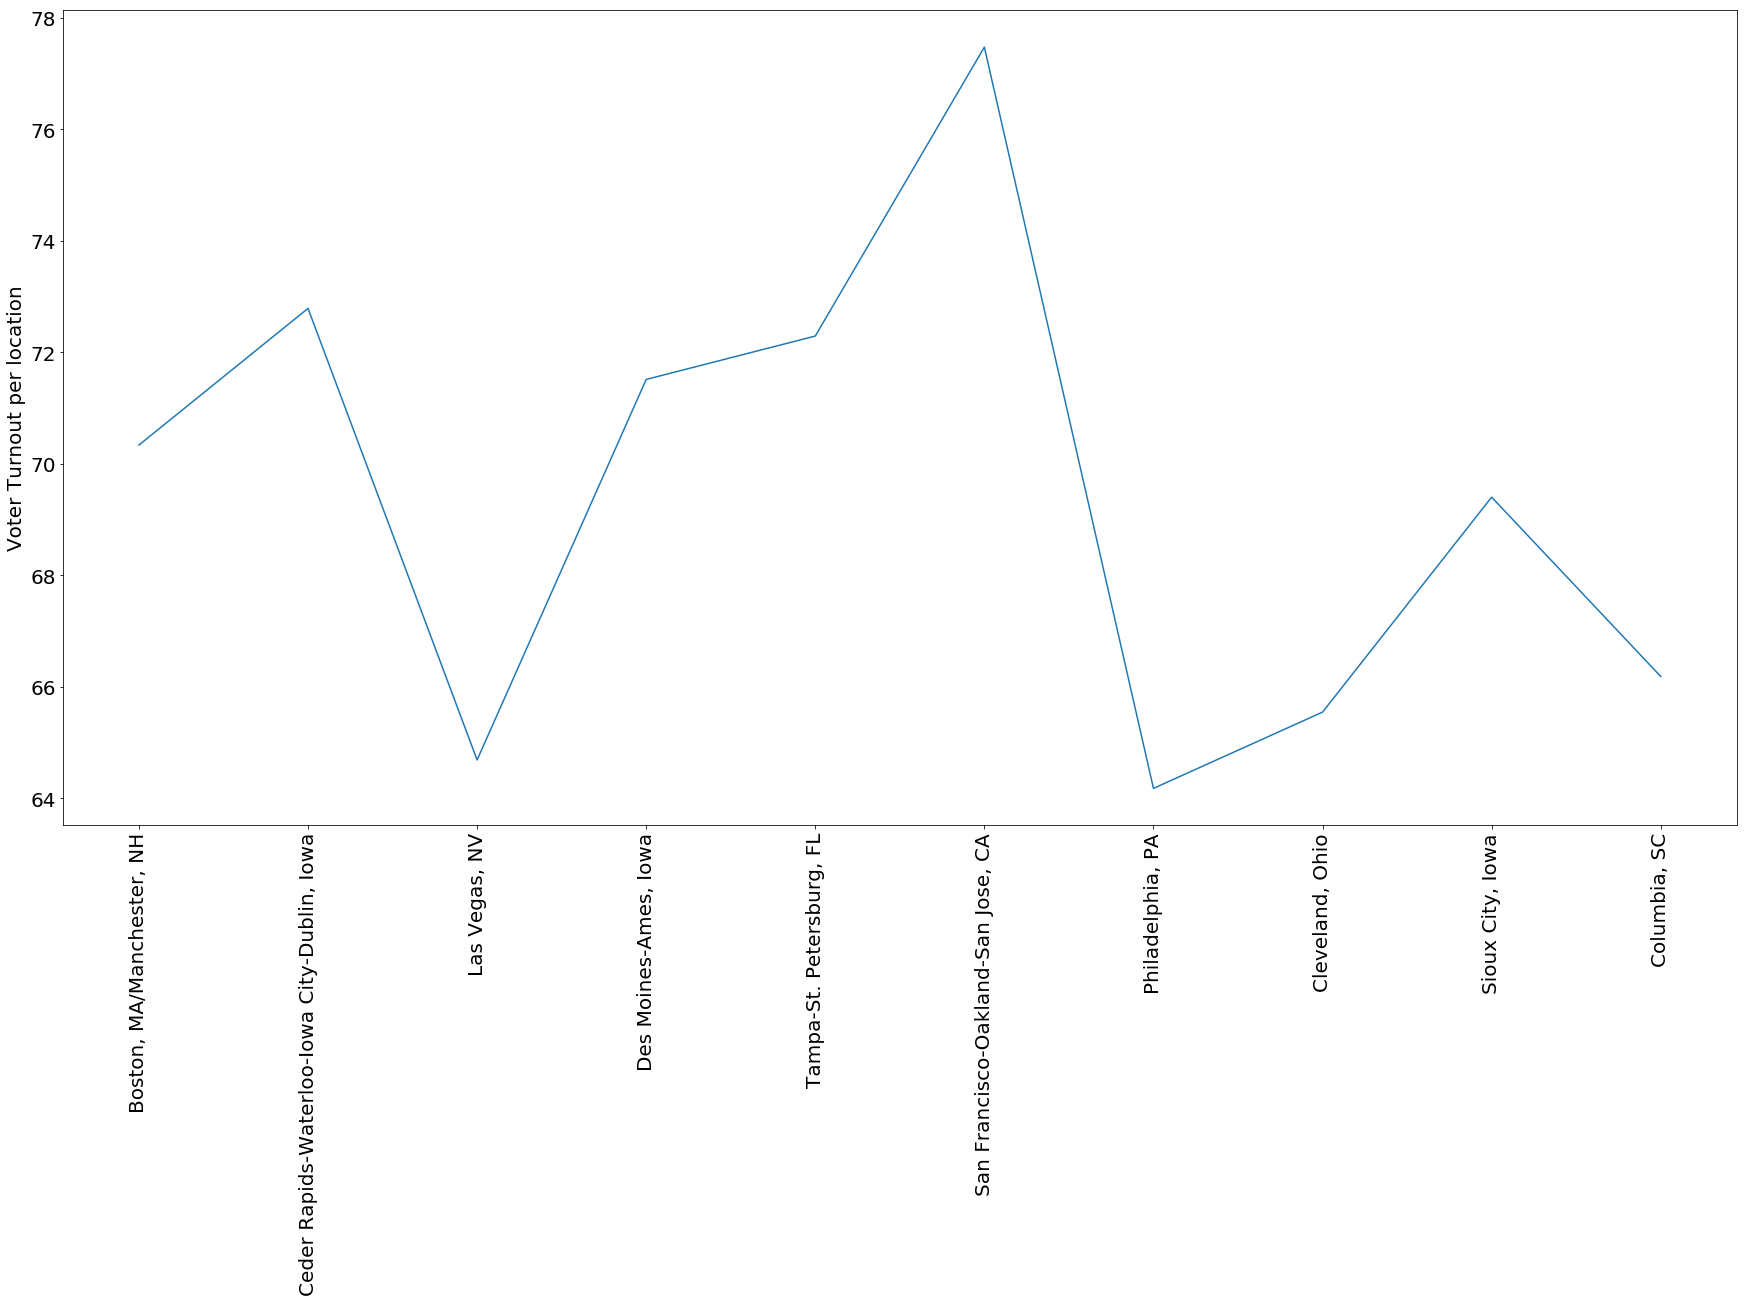

In [154]:
plt.figure(figsize=(30,15))
plt.plot(locations, turnout)
plt.ylabel('Voter Turnout per location', size=20)
plt.xticks(locations, rotation=90)
plt.tick_params(labelsize=20)
plt.title('Voter turnout per location')
plt.show()